<blockquote>
    <h1>Exercise 8.7</h1>
    <p>In the lab, we applied random forests to the <code>Boston</code> data using $\mathrm{mtry}=6$ and using $\mathrm{ntree}=25$ and $\mathrm{ntree}=500$. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for $\mathrm{mtry}$ and $\mathrm{ntree}$. You can model your plot after Figure 8.10. Describe the results obtained.</p>
</blockquote>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../../DataSets/Boston/Boston.csv")
df_y = df[['medv']]
df_x = df.drop('medv', 1)
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df_x, 
    df_y, 
    test_size=0.5, 
    random_state=42
)

In [3]:
mtry_dict = {
    'auto': r'$m=p$',
    0.5: r'$m=p/2$',
    'sqrt': r'$m=\sqrt{p}$', 
}
mse_results = {mtry: [] for mtry in mtry_dict}
ntree_arr = np.arange(1, 502, 10)
for mtry, mtry_description in mtry_dict.items():
    for ntree in ntree_arr:
        rnd_clf = RandomForestRegressor(n_estimators=ntree, max_features=mtry, oob_score=False, 
                                bootstrap=True, random_state=42, n_jobs=-1)
        _ = rnd_clf.fit(df_x_train, df_y_train.squeeze())
        
        Y_pred = rnd_clf.predict(df_x_test)
        MSE = mean_squared_error(Y_pred, df_y_test)
        mse_results[mtry].append(MSE)

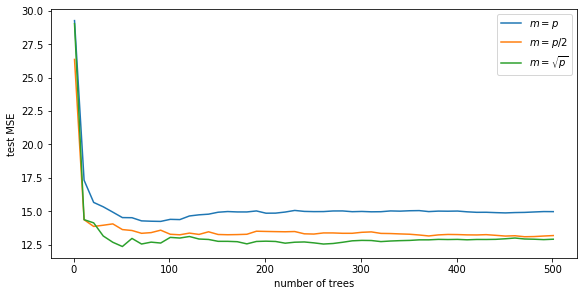

In [4]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
for mtry, mse_arr in mse_results.items():
    _ = ax.plot(ntree_arr, mse_arr, label=mtry_dict[mtry])

_ = ax.legend(loc=1)
_ = ax.set_xlabel('number of trees')
_ = ax.set_ylabel('test MSE')